In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import math

In [ ]:
#
# TODO 전체 목차: [ 데이터 전처리 및 시각화 ]
# 0)맨 처음에 단순 '개수'비교를 제일 먼저 하기(분야별 기업 개수)
    # (a)1차직군별 / (b)IT의-2차직군별

# IT/웹/통신 산업의 기업 목록이 총 6204개
    # 1) 개별항목 별 평점은 내비두고, 각 기업의 전체 리뷰 평점만 check하기
    # 1-2) 2차산업군별 {기업명: [평점, 리뷰수, 평균연봉]} <- 3개항목 뽑아내기
        # 1-2-2) 2차산업군별 평점 평균 
        # 1-2-3) 평균연봉과 평점에 상관관계 뽑아낼 수 있을 듯ㅇㅇ.
            # 근데 사실 유의미한 건 아닐듯 -> 연봉 높게 받는 사람이 여기에 불만 글 쓰겠냐..ㅎㅎ;; -> 아니지 내 뇌피셜임 이건
            # 그냥 담백하게 상관관계만 보여주면 될듯 -> 여기서 분석해서 의의를 뽑기에는 자료가 너무 단편적이라 어려워보임
                # * 평균연봉 어케뽑아낸거지 -> 리뷰쓴 사람들의 평균연봉은 아니고, 그냥 임원합친, 전체평균이겠지?
                # -> 잡플래닛 데이터 중 '5년 내' 등록된 정규직 데이터만을 사용합니다. 과거 데이터는 현재 물가 상승률에 맞게 가공하여 정확도를 상승 시킵니다.
    # 1-3) IT산업 전체 평점 평균 vs 타산업군 평점 평균
    # 2) 3차분류로, 지역이 있는데 이건 배제 - 다 수도권에 몰려있다는 당연한 사실 빼곤, 뽑을 수 있는 것x

### step1. csv파일 다 긁어오면서 정보 가져오기

In [ ]:

# *전체직군(1차분류) & IT업종의 2차산업군별
# *1)기업수, 2)평점 평균, 3)(평균)연봉의 평균
total_csv_list = ['1-0.SERVICE.csv','1-1.MANUFAC_CHEMI.csv','1-2.MEDICAL.csv','1-3.DISTRI_TRADE.csv','1-4.EDUCATION.csv',
               '1-5.CONSTRUCTION.csv','1-6.IT.csv','1-7.MEDIA.csv','1-8.FINANCIAL.csv','1-9.ASSOCIATION.csv']
it_csv_list = ['0-0.web_agency.csv', '0-1.portal_internet_contents.csv', '0-2.shoppingmall_oepnmarket.csv', '0-3.network_commu_mobile.csv', '0-4.hardware_equip.csv',
                  '0-5.security_vaccine.csv','0-6.solution_SI_ERP_CRM.csv','0-7.IT_consulting.csv','0-8.game.csv','0-9.etc_IT_web_commu.csv']
total_korean_key = ['서비스업', '제조/화학', '의료/제약/복지', '유통/무역/운송', '교육업',
                    '건설업', 'IT/웹/통신', '미디어/디자인', '은행/금융업' ,'기관/협회']
it_korean_key = ['웹에이젼시', '포털/인터넷/콘텐츠', '쇼핑몰/오픈마켓', '네트워크/통신/모바일', '하드웨어/장비',
                 '보안/백신', '솔루션/SI/ERP/CRM', 'IT컨설팅', '게임', '기타 IT/웹/통신']
total_count = {}
total_average_rate = {}
total_average_salary = {}
it_count = {}
it_average_rate = {}
it_average_salary = {}

a = pd.read_csv('1-6.IT.csv')
a
c = math.ceil(a['평점'].mean()) # 3164.3488372093025
d = math.ceil(a['평균 연봉(만)'].mean()) # 3164.3488372093025

# 1. 1차 산업분류별 for문
for ele1 in total_csv_list:
    key = total_korean_key[total_csv_list.index(ele1)]
    df = pd.read_csv(ele1)
    total_count[key] = len(df)
    total_average_rate[key] = round(df['평점'].mean(),2) # 평점은 소숫점2자리까지 반올림
    total_average_salary[key] = math.ceil(df['평균 연봉(만)'].mean())

# 2. 2차 산업분류별 for문
for ele2 in it_csv_list:
    key = it_korean_key[it_csv_list.index(ele2)]
    df = pd.read_csv(ele2)
    it_count[key] = len(df)
    it_average_rate[key] = round(df['평점'].mean(),2)
    it_average_salary[key] = math.ceil(df['평균 연봉(만)'].mean())

# 3. 결과확인
print(total_count,it_count, sep="\n")
print()
print(total_average_salary, it_average_salary, sep="\n")
print()
print(total_average_rate, it_average_rate, sep="\n")


{'서비스업': 1732, '제조/화학': 5990, '의료/제약/복지': 969, '유통/무역/운송': 3151, '교육업': 643, '건설업': 1149, 'IT/웹/통신': 5437, '미디어/디자인': 1974, '은행/금융업': 600, '기관/협회': 1247}
{'웹에이젼시': 129, '포털/인터넷/콘텐츠': 669, '쇼핑몰/오픈마켓': 189, '네트워크/통신/모바일': 207, '하드웨어/장비': 120, '보안/백신': 31, '솔루션/SI/ERP/CRM': 3008, 'IT컨설팅': 313, '게임': 311, '기타 IT/웹/통신': 448}

{'서비스업': 3158, '제조/화학': 3584, '의료/제약/복지': 3466, '유통/무역/운송': 3478, '교육업': 3069, '건설업': 3533, 'IT/웹/통신': 3565, '미디어/디자인': 3084, '은행/금융업': 4710, '기관/협회': 3666}
{'웹에이젼시': 3165, '포털/인터넷/콘텐츠': 3534, '쇼핑몰/오픈마켓': 3389, '네트워크/통신/모바일': 3934, '하드웨어/장비': 3415, '보안/백신': 3579, '솔루션/SI/ERP/CRM': 3535, 'IT컨설팅': 3681, '게임': 3653, '기타 IT/웹/통신': 3757}

{'서비스업': 2.77, '제조/화학': 2.59, '의료/제약/복지': 2.72, '유통/무역/운송': 2.72, '교육업': 2.94, '건설업': 2.74, 'IT/웹/통신': 2.95, '미디어/디자인': 2.78, '은행/금융업': 3.03, '기관/협회': 2.92}
{'웹에이젼시': 2.94, '포털/인터넷/콘텐츠': 3.05, '쇼핑몰/오픈마켓': 3.01, '네트워크/통신/모바일': 3.17, '하드웨어/장비': 2.64, '보안/백신': 3.24, '솔루션/SI/ERP/CRM': 2.89, 'IT컨설팅': 3.0, '게임': 2.93, '기타 IT/웹/통신': 3.19}


### STEP2. 시각화

In [ ]:
# 0. 현재 컴퓨터에 설치된 글꼴의 폰트 패밀리 알아보는 방법
[f.name for f in fm.fontManager.ttflist]
# 0-2. 한글 깨짐 방지용 폰트 코드
plt.rc('font', family='Malgun Gothic')

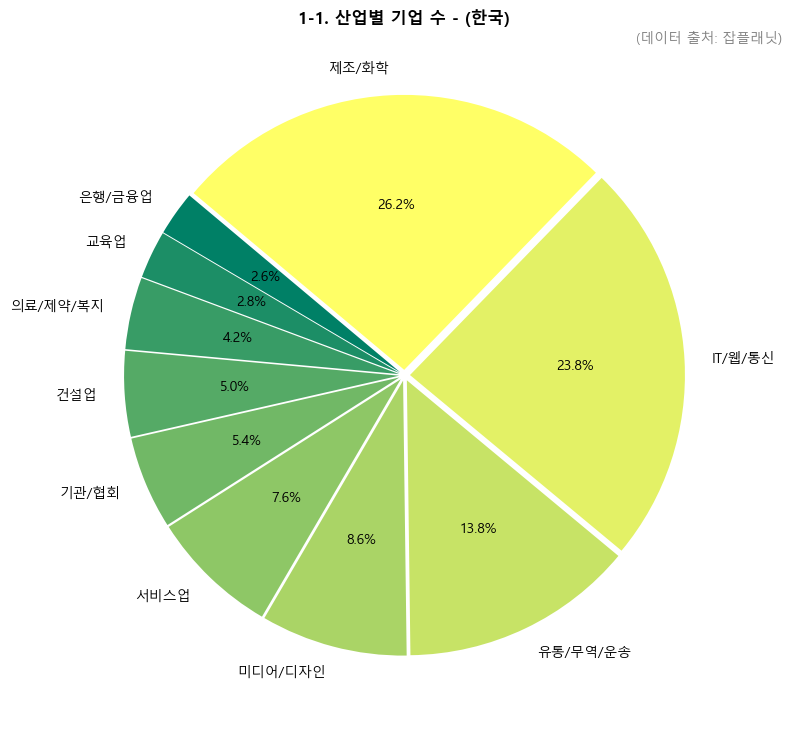

In [ ]:

# * [Ⅰ-1. 기업수: 전체]
# ------------------------

# 1. 막대그래프 그리기 - 폐기
# plt.figure(figsize=(7, 7))

# tmp_colors1 = ['lightgreen' if (industry != '제조/화학' and industry != 'IT/웹/통신')  else 'C2' for industry in total_count.keys()]
# plt.bar(total_count.keys(), total_count.values(), color=tmp_colors1)
# plt.title('1-1. 산업별 기업 수 - (한국)',  fontweight='bold')
# plt.xticks(rotation=45, ha="right")
# plt.xlabel('산업 분류', fontsize=12, color='C2', fontweight='bold')
# plt.text(0.95, 0.95, '(데이터 출처: 잡플래닛)', transform=plt.gca().transAxes,
#          fontsize=10, color='gray', ha='right', va='top')
# # 값 표시
# for i in range(len(total_count.keys())):
#     text_color = 'black' if (i != 1 and i != 6) else 'red'
#     plt.text(list(total_count.keys())[i], list(total_count.values())[i], list(total_count.values())[i],
#              color=text_color, ha='center', va='bottom')


# plt.tight_layout()  
# plt.show()
# ------------

sorted_total_count = {k: v for k, v in sorted(total_count.items(), key=lambda item: item[1], reverse=False)}

plt.figure(figsize=(8, 8))

colors = plt.cm.summer(np.linspace(0, 1, 10))
explodes = [0.02 for _ in range(10)]
plt.pie(sorted_total_count.values(), labels=sorted_total_count.keys(), colors=colors,
        autopct='%1.1f%%', startangle=140, explode=explodes)
plt.title('1-1. 산업별 기업 수 - (한국)', fontweight='bold')

# Adding data source text
plt.text(1.05, 1.0, '(데이터 출처: 잡플래닛)', transform=plt.gca().transAxes,
         fontsize=10, color='gray', ha='right', va='top')

plt.tight_layout() # 레이블이 잘리지 않도록 조정
plt.show()

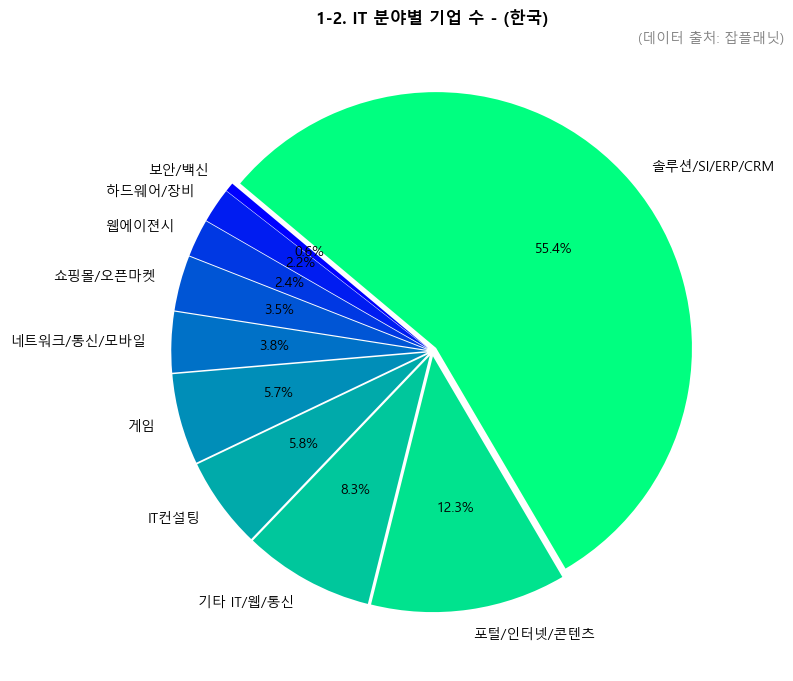

In [ ]:

# * [Ⅰ-2. 기업수: IT별]
# ------------------------
# 1. 막대그래프 그리기 - 폐기
# plt.figure(figsize=(7, 7))

# tmp_colors = ['lightgreen' if industry != '솔루션/SI/ERP/CRM' else 'C1' for industry in it_count.keys()]
# plt.bar(it_count.keys(), it_count.values(), color=tmp_colors)
# plt.title('1-2. IT 분야별 기업 수 - (한국)',  fontweight='bold')
# plt.xticks(rotation=45, ha="right")
# plt.xlabel('산업 분류', fontsize=12, color='C2', fontweight='bold')
# plt.text(0.95, 0.95, '(데이터 출처: 잡플래닛)', transform=plt.gca().transAxes,
#          fontsize=10, color='gray', ha='right', va='top')

# for i in range(len(it_count.keys())):
#     text_color = 'black' if i != 6 else 'red'
#     plt.text(list(it_count.keys())[i], list(it_count.values())[i], list(it_count.values())[i],
#              color=text_color, ha='center', va='bottom')

# plt.tight_layout() 
# plt.show()
# ------------

sorted_it_count = {k: v for k, v in sorted(it_count.items(), key=lambda item: item[1], reverse=False)}

plt.figure(figsize=(8, 8))

colors = plt.cm.winter(np.linspace(0, 1, 10))
explodes = [0.02 for _ in range(10)]
plt.pie(sorted_it_count.values(), labels=sorted_it_count.keys(), colors=colors,
        autopct='%1.1f%%', startangle=140, explode=explodes)
plt.title('1-2. IT 분야별 기업 수 - (한국)', fontweight='bold')

# Adding data source text
plt.text(1.05, 1.0, '(데이터 출처: 잡플래닛)', transform=plt.gca().transAxes,
         fontsize=10, color='gray', ha='right', va='top')

plt.tight_layout() # 레이블이 잘리지 않도록 조정
plt.show()

In [ ]:

# TODO: 평점, 연봉의 평균은 정렬해서 보여주기(기업수는 굳이..이긴해서 안 함)
# TODO 가로는 그.리.드 넣는게 보기 더 좋은것 같음
# TODO: 또한, 평점 평균은 수치가 너무 비슷비슷해서 구별이 잘 안가;; 어떻게 해야하는가?

In [1]:

# * [Ⅱ-1. 만족도 평균: 전체] - 1트(bad)
# ------------------------
import matplotlib.pyplot as plt

# 만족도 높은 순으로 정렬
sorted_a = {k: v for k, v in sorted(total_average_rate.items(), key=lambda item: item[1], reverse=False)}

# 시각화
plt.figure(figsize=(6, 4.5))
plt.barh(list(sorted_a.keys()), list(sorted_a.values()), color='skyblue')
plt.xlabel('만족도')
plt.title('2-0. 산업별 만족도 평균 - 1트(bad)')
plt.tight_layout()
plt.show()

NameError: name 'total_average_rate' is not defined

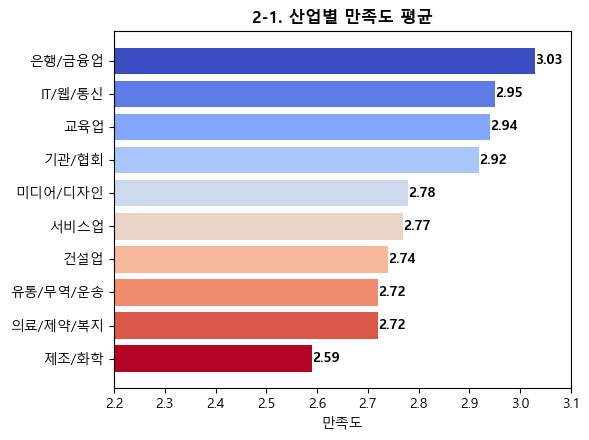

In [ ]:

# * [Ⅱ-1. 만족도 평균: 전체] - 2트(성공)
# point1: 그라데이션 느낌나는 막대별 색상(연하게 -> 진하게) & (밝게 -> 아래로 갈수록 -> 어둡게) 평점그래도 높으면 good이니
# point2: x축 간격을 줄이기 & 시작포인트 조절 (기존: 0~5)
# ------------------------
# cm.coolwarm:색상 맵(=컬러맵)에서, 색상을 선택 & 컬러맵 종류: magma, viridis etc...
colors = plt.cm.coolwarm(np.linspace(1, 0, 10)) 

plt.figure(figsize=(6, 4.5))
bars = plt.barh(list(sorted_a.keys()), list(sorted_a.values()), color=colors) # *point1
plt.xlabel('만족도')
plt.title('2-1. 산업별 만족도 평균', fontweight='bold')

# 각 막대에 값 표시
for bar, value in zip(bars, sorted_a.values()):
    plt.text(value, bar.get_y() + bar.get_height()/2, f'{value:.2f}', va='center', ha='left', color='black', fontweight='bold')

plt.xlim(2.2, 3.1) # *point2
plt.tight_layout()
plt.show()

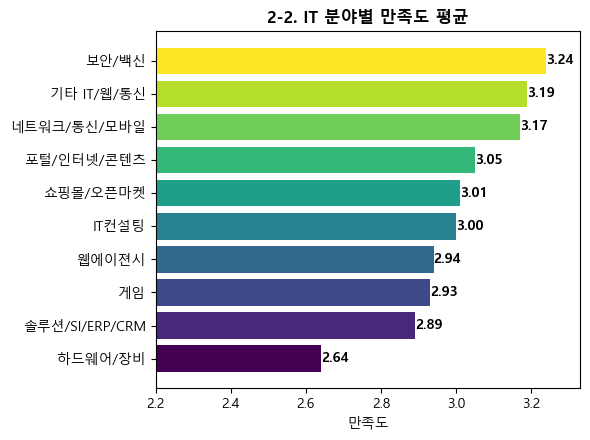

In [ ]:

# * [Ⅱ-2. 만족도 평균: IT별]
# ------------------------
sorted_b = {k: v for k, v in sorted(it_average_rate.items(), key=lambda item: item[1], reverse=False)}
colors = plt.cm.viridis(np.linspace(0, 1, 10))

plt.figure(figsize=(6, 4.5))
bars = plt.barh(list(sorted_b.keys()), list(sorted_b.values()), color=colors) 
plt.xlabel('만족도')
plt.xlim(2.2, 3.33)
plt.title('2-2. IT 분야별 만족도 평균', fontweight='bold')

# 각 막대에 값 표시
for bar, value in zip(bars, sorted_b.values()):
    plt.text(value, bar.get_y() + bar.get_height()/2, f'{value:.2f}', va='center', ha='left', color='black', fontweight='bold')

plt.tight_layout()
plt.show()

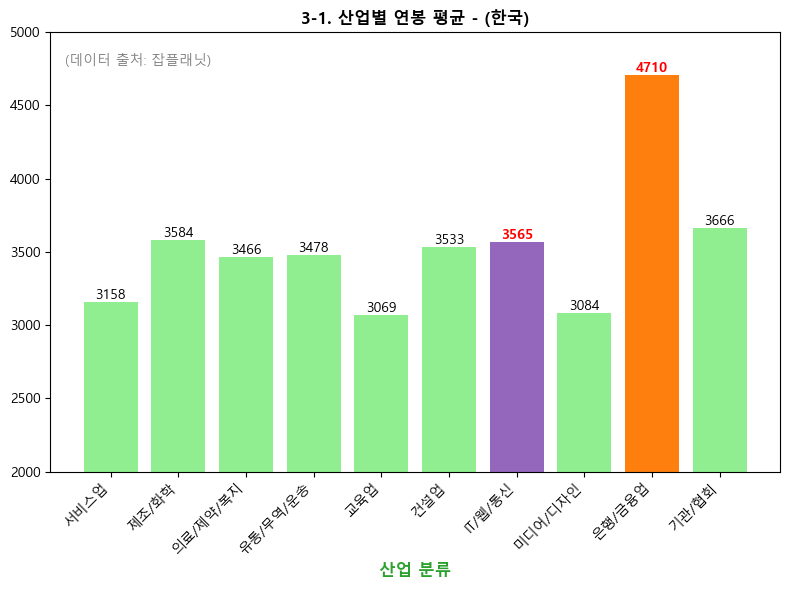

In [ ]:

# * [Ⅲ-1. 연봉 평균: 전체]
# ------------------------
plt.rc('font', family='Malgun Gothic')

# 1. 막대그래프 그리기
plt.figure(figsize=(8, 6))

# 1-1. total 기업수
tmp_colors1 = ['C4' if industry == 'IT/웹/통신' else 'lightgreen' if industry != '은행/금융업' else 'C1'
               for industry in total_average_salary.keys()]
plt.bar(total_average_salary.keys(), total_average_salary.values(), color=tmp_colors1)
plt.title('3-1. 산업별 연봉 평균 - (한국)',  fontweight='bold')
plt.xticks(rotation=45, ha="right")
plt.xlabel('산업 분류', fontsize=12, color='C2', fontweight='bold')
plt.ylim(2000,5000)
plt.text(0.22, 0.95, '(데이터 출처: 잡플래닛)', transform=plt.gca().transAxes,
         fontsize=10, color='gray', ha='right', va='top')
# 값 표시
for i in range(len(total_average_salary.keys())):
    # text_color = 'black' if (i != 6 and i != 8) else 'red'
    if i != 6 and i!= 8:
        plt.text(list(total_average_salary.keys())[i], list(total_average_salary.values())[i], list(total_average_salary.values())[i],
                color='black', ha='center', va='bottom')
    else:
        plt.text(list(total_average_salary.keys())[i], list(total_average_salary.values())[i], list(total_average_salary.values())[i],
                color='red', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()  # 레이블이 잘리지 않도록 조정
plt.show()

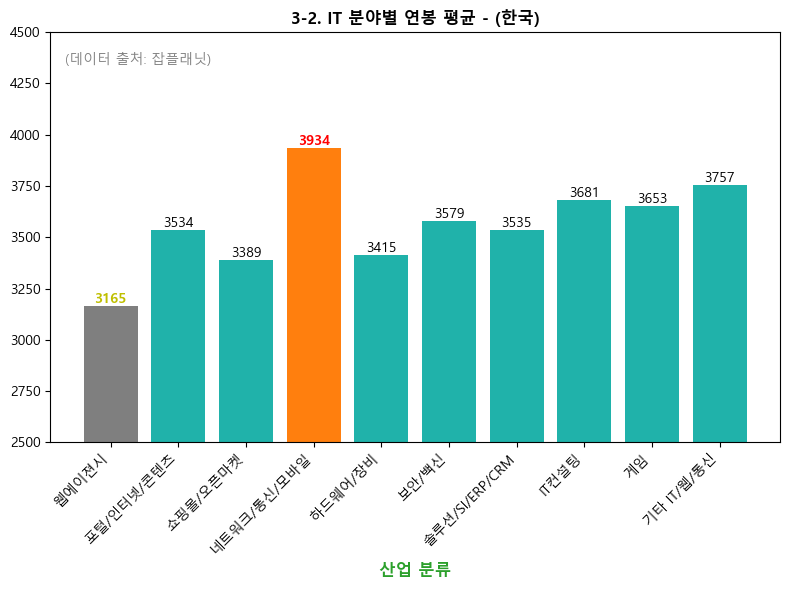

In [ ]:

# * [Ⅲ-2. 연봉 평균: IT별]
# ------------------------
plt.rc('font', family='Malgun Gothic')

# 1. 막대그래프 그리기
plt.figure(figsize=(8, 6))

# 1-1. total 기업수
tmp_colors1 = ['C7' if industry == '웹에이젼시' else 'lightseagreen' if industry != '네트워크/통신/모바일' else 'C1'
               for industry in it_average_salary.keys()]
plt.bar(it_average_salary.keys(), it_average_salary.values(), color=tmp_colors1)
plt.title('3-2. IT 분야별 연봉 평균 - (한국)',  fontweight='bold')
plt.xticks(rotation=45, ha="right")
plt.xlabel('산업 분류', fontsize=12, color='C2', fontweight='bold')
plt.ylim(2500,4500)
plt.text(0.22, 0.95, '(데이터 출처: 잡플래닛)', transform=plt.gca().transAxes,
         fontsize=10, color='gray', ha='right', va='top')
# 값 표시
for i in range(len(it_average_salary.keys())):
    if i != 0 and i!= 3:
        plt.text(list(it_average_salary.keys())[i], list(it_average_salary.values())[i], list(it_average_salary.values())[i],
                color='black', ha='center', va='bottom')
    else:
        text_color = 'red' if i == 3 else 'y'
        plt.text(list(it_average_salary.keys())[i], list(it_average_salary.values())[i], list(it_average_salary.values())[i],
                color=text_color, ha='center', va='bottom', fontweight='bold')

plt.tight_layout()  # 레이블이 잘리지 않도록 조정
plt.show()

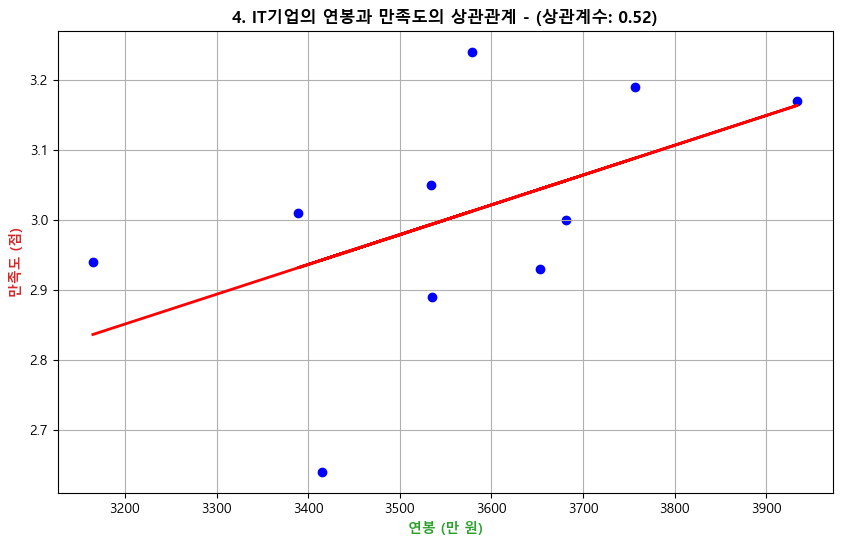

In [ ]:

# * [Ⅳ. IT기업별 만족도와 연봉의 상관관계]
# 연봉은 막대그래프로, 평점은 굵은선그래프로 / 대신 막대그래프는 엄청 연하게
# -> ㄴㄴ. scatter(산점도)로 하는게 훨씬 나음
# np.corrcoef 모듈로 상관계수도 써주기
# 우측위로 향하는 대각선도 그려주기 - 선형회귀 직선(from 챗gpt)
# -------------------------------

# 상관관계 계산 - 근데 이건 그냥 해본 것. 자료가 너무 단편적이라 정확하고, 유의미한 결과는 x
# 상관계수 0.52는 두 변수 사이에 중간 정도의 양의 선형 관계가 있음을 나타낸다 -> 이는 IT기업의 연봉이 높아질수록 직원의 만족도도 어느 정도 높아진다는 것을 의미하지만, 관계가 완벽하게 선형적이거나 매우 강력하지는 않다는 것을 의미합니다. 즉, 연봉과 만족도 사이에는 어느 정도의 긍정적인 연관성이 있지만, 연봉만이 만족도에 영향을 주는 유일한 요소는 아니
상관계수 = np.corrcoef(list(it_average_salary.values()), list(it_average_rate.values()))[0, 1]

salaries = np.array(list(it_average_salary.values()))
rates = np.array(list(it_average_rate.values()))

# 선형 회귀 직선을 위한 계수 계산 (기울기와 절편)
slope, intercept = np.polyfit(salaries, rates, 1)

# 선형 회귀 직선 계산
linear_regression = slope * salaries + intercept

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(salaries, rates, color='blue')

# 선형 회귀 직선 추가
plt.plot(salaries, linear_regression, color='red', linewidth=2)

plt.title(f'4. IT기업의 연봉과 만족도의 상관관계 - (상관계수: {상관계수:.2f})', fontweight='bold')
plt.xlabel('연봉 (만 원)', color='C2', fontweight='bold')
plt.ylabel('만족도 (점)', color='C3', fontweight='bold')
plt.grid(True)
plt.show()


In [ ]:
# ---------------------
# end